# PCA Summary
### What does PCA do? 
PCA essentially is a technique used to reduce the dimensionality of data while retaining as much information as possible. Instead of graphing the data along however many axes are originally given, PCA allows one to identify the most important axes (which aren't necessarily one of the original dimensions) along which the data can be projected for visualization or calculation. 

### The math behind PCA: 
1. Start with $X$, an $m$ x $n$ dimension matrix, otherwise known as a set of $m$ data points with $n$ dimensions each. 
2. Construct the deviation matrix $D$, using $D$ $=$ $X - [1]X*\frac{1}{n}$, where $[1]X*\frac{1}{n}$ is a matrix with columns of the mean of all the data points across each dimension.
3. Next, construct the covariance matrix $V$, using $V$ $=$ $D^T D$.
4. Find the eigenvalues $\lambda$ of $V$ by solving $det (V-[I]*\lambda)$ for $\lambda$, where $[I]$ is the identity matrix. 
5. Arranging the calculated eigenvalues from the determinant in the last step from highest to lowest, find the corresponding eigenvectors to the first couple of eigenvalues or however many principal components are desired. To find eigenvectors mathematically, use $V\vec{w}$ $=$ $\lambda\vec{w}$ or $(V-\lambda)\vec{w}=0$
6. The eigenvector $\vec{w}$ corresponding to the highest eigenvalue $\lambda$ is the first principal component often written PC1, the $\vec{w}$ corresponding to the second highest $\lambda$ is PC2, and so on. 

### Mini-Project #4 Part 2 
(a) (Warm-up, do not submit.) Say we ran PCA on the binary matrix X above. What would be the dimension of the returned vectors?
* the vectors would be 1x10101, because the data has 10101 dimensions

(b) (6 points) We will examine the first 2 principal components of X. These components contain lots of information about our data set. Create a scatter plot with each of the 995 rows of X projected onto the first two principal components. In other words, the horizontal axis should be v1, the vertical axis v2, and each individual should be projected onto the subspace spanned by v1 and v2. Your plot must use a different color for each population and include a legend.
* See cell below:

(c) (7 points) In two sentences, list 1 or 2 basic facts about the plot created in part (b). Can you interpret the first two principal components? What aspects of the data do the first two principal components capture? Hint: think about history and geography.
* The first prinicipal component looks like it could be related to distance from East Africa to the population's current area, while the second componenet seems like it could be related to climate classification.

(d) (5 points) We will now examine the third principal component of X. Create another scatter plot with each individual projected onto the subspace spanned by the first and third principal components. After plotting, play with different labeling schemes (with labels derived from the meta-data) to explain the clusters that you see. Your plot must include a legend.
* The data plotted and colored by population group is uninteresting in the new plot, really only showing the same differences along the PC1 axis that were seen in part (c). However, colored by sex, there is a much more distinct clustering seen along the PC3 axis, with males being more positive on the PC3 axis and females being more negative. 

(e) (5 points) Something should have popped out at you in the plot above. In one sentence, what infor- mation does the third principal component capture?
* Essentially, PC3 captures the sex of the genome owner.

(f) (4 points) In this part, you will inspect the third principal component. Plot the nucleobase index vs the absolute value of the third principal component. What do you notice? What’s a possible explanation? Hint: think about chromosomes.
* Didn't get it to work. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('p4dataset2020.txt', sep=" ", header=None)
data2 = data.drop(data.columns[[0,1, 2]], axis=1)
mode_row = data2.mode()
rango = list(range(3, 10104))
d3 = pd.DataFrame(columns=rango)
d3 = d3.append([mode_row]*995,ignore_index=True)
dbool = d3 != data2
dbool = dbool.astype(int)
dmeta=data.iloc[:,0:3]
dboolmeta= pd.concat([dmeta, dbool], axis=1)

In [3]:
dboolmeta

,0,1,2,3,4,5,6,7,8,9,...,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103
0,HG01879,1,ACB,0,1,0,1,0,1,1,...,0,1,1,1,0,0,1,0,0,1
1,HG01880,2,ACB,1,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
2,HG01881,2,ACB,1,0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,0
3,HG01882,1,ACB,1,0,0,0,0,1,0,...,1,1,1,0,0,0,0,0,0,0
4,HG01883,2,ACB,0,0,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,NA20361,2,ASW,0,1,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,0
991,NA20362,1,ASW,0,0,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,0
992,NA20364,2,ASW,1,0,1,0,1,0,0,...,1,1,1,0,0,0,0,0,0,0
993,NA20412,2,ASW,0,1,1,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0


In [3]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dbool)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, dboolmeta.iloc[:,2]], axis = 1)
finalDf.columns.values[2] = "target"
targets=np.unique(dboolmeta.iloc[:,2])

**Code from:** https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

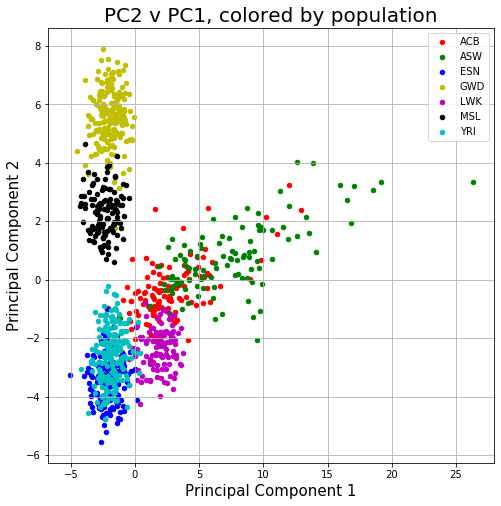

In [4]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PC2 v PC1, colored by population', fontsize = 20)
colors = ['r', 'g', 'b','y','m','k','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

**Code from:** https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

1. ACB	- African Caribbeans in Barbados
2. ASW	- Americans of African Ancestry in SW USA
3. ESN	- Esan in Nigeria
4. GWD - Gambian in Western Divisions in the Gambia
5. LWK	- Luhya in Webuye, Kenya
6. MSL - Mende in Sierra Leone
7. YRI - Yoruba in Ibadan, Nigeria

In [5]:
pca5 = PCA(n_components=3)
principalComponents5 = pca5.fit_transform(dbool)
principalDf5 = pd.DataFrame(data = principalComponents5
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf5 = pd.concat([principalDf5, dboolmeta.iloc[:,1]], axis = 1)
finalDf5.columns.values[3] = 'target5'
targets5=np.unique(dboolmeta.iloc[:,1])
finalDf5=finalDf5.drop('principal component 2', axis=1)

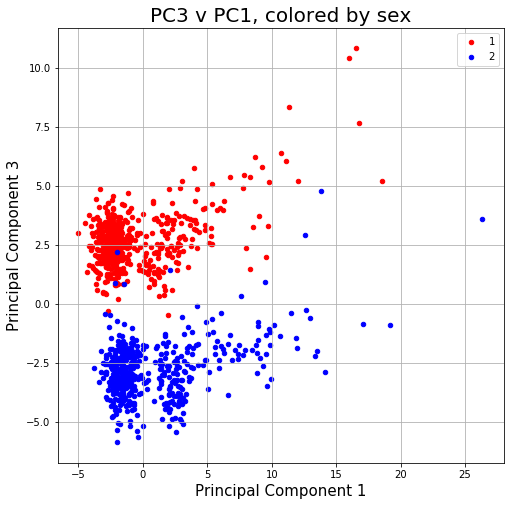

In [6]:
fig5 = plt.figure(figsize = (8,8))
ax5 = fig5.add_subplot(1,1,1) 
ax5.set_xlabel('Principal Component 1', fontsize = 15)
ax5.set_ylabel('Principal Component 3', fontsize = 15)
ax5.set_title('PC3 v PC1, colored by sex', fontsize = 20)
colors5 = ['r', 'b']
for target, color in zip(targets5,colors5):
    indicesToKeep = finalDf5['target5'] == target
    ax5.scatter(finalDf5.loc[indicesToKeep, 'principal component 1']
               , finalDf5.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 20)
ax5.legend(targets5)
ax5.grid()

1. 1 - male
2. 2 - female